In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

color_dict = {'Nucleaire' : 'orange',\
              'Fossiles' : 'red',\
              'Renouv': 'green',\
              'Eolien': 'mediumslateblue', \
              'Solaire': 'gold', \
              'Hydraulique': 'deepskyblue', \
              'HydrauliqueFilEauPlusEcluses': 'lightskyblue', \
              'HydrauliqueLacs': 'cadetblue', \
              'HydrauliqueSTEPturbinage': 'lightseagreen', \
              'Bioenergies': 'forestgreen', \
              'Consommation': 'blue', \
              'ProdTot': 'magenta', \
              'EchPhysiques': 'grey', \
              'Pompage': 'darkblue'}

def colors(what):
    return [color_dict.get(x, 'black') for x in what]

def highlight_weekends(ax, timeseries):
    dt = timeseries.dt
    ranges = timeseries[dt.dayofweek >= 5].groupby(dt.year * 100 + dt.weekofyear).agg(['min', 'max'])
    for i, tmin, tmax in ranges.itertuples():
        ax.axvspan(tmin, tmax, facecolor='orange', edgecolor='none', alpha=0.3)

file2012 = r'files/RTE/eCO2mix_RTE_Annuel-Definitif_2012_fixed.csv'
file2013 = r'files/RTE/eCO2mix_RTE_Annuel-Definitif_2013_fixed.csv'
file2014 = r'files/RTE/eCO2mix_RTE_Annuel-Definitif_2014_fixed.csv'
file2015 = r'files/RTE/eCO2mix_RTE_Annuel-Definitif_2015_fixed.csv'
file2016 = r'files/RTE/eCO2mix_RTE_Annuel-Definitif_2016_fixed.csv'
file2017 = r'files/RTE/eCO2mix_RTE_Annuel-Definitif_2017_fixed.csv'

dtypesDict={'Perimetre': str, 
                                       'Nature': str, \
                                       'Date':str, \
                                       'Heures': str, \
                                       'Consommation': float, \
                                       'PrevisionJ1': float, \
                                       'PrevisionJ': float, \
                                       'Fioul': float, \
                                      'Charbon': float, \
                                      'Gaz': float, \
                                      'Nucleaire': float, \
                                      'Eolien': float, \
                                      'Solaire': float, \
                                      'Hydraulique': float, \
                                     'Pompage': float, \
                                      'Bioenergies': float, \
                                      'EchPhysiques': float, \
                                      'TauxdeCo2': float}
# 'EchCommAngleterre': float}#, \
                                     #  'EchCommEspagne': float, \
                                     #  'EchCommItalie': float, \
                                     #  'EchCommSuisse': float, \
                                     #  'EchCommAllemagneBelgique': float, \
                                     #  'FioulTAC': float, \
                                     #  'FioulCogen': float, \
                                     #  'FioulAutres': float, \
                                     #  'GazTAC': float, \
                                     #  'GazCogen': float, \
                                     #  'GazCCG': float, \
                                     #  'GazAutres': float, \
                                     #  'HydrauliqueFilEauPlusEcluses': float, \
                                     #  'HydrauliqueLacs': float, \
                                     #  'HydrauliqueSTEPturbinage': float, \
                                     #  'BioenergiesDechets': float, \
                                     #  'BioenergiesBiomasse': float})#, \
                                       #'BioenergiesBiogaz': float}

df2012 = pd.read_csv(file2012, sep=',', low_memory=False, dtype=dtypesDict)
df2013 = pd.read_csv(file2013, sep=',', low_memory=False, dtype=dtypesDict)
df2014 = pd.read_csv(file2014, sep=',', low_memory=False, dtype=dtypesDict)
df2015 = pd.read_csv(file2015, sep=',', low_memory=False, dtype=dtypesDict)
df2016 = pd.read_csv(file2016, sep=',', low_memory=False, dtype=dtypesDict)
df2017 = pd.read_csv(file2017, sep=',', low_memory=False, dtype=dtypesDict)
frames = [df2012, df2013, df2014, df2015, df2016, df2017]
df = pd.concat(frames)                              

#file=r'files/eCO2mix_RTE_Annuel-Definitif_2017.xlsx'
#df = pd.read_excel(file)

df["DateTime"] = df["Date"] + ' ' + df["Heures"]
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M')

In [2]:
def CalcStuff(df):
    df['FioulReCalc'] = df['FioulTAC'] + df['FioulCogen'] + df['FioulAutres']
    df['GazReCalc'] = df['GazTAC'] + df['GazCogen'] + df['GazCCG'] + df['GazAutres']
    df['HydrauliqueReCalc'] = df['HydrauliqueFilEauPlusEcluses'] + df['HydrauliqueLacs'] + df['HydrauliqueSTEPturbinage']
    df['BioenergiesReCalc'] = df['BioenergiesDechets'] + df['BioenergiesBiomasse'] + df['BioenergiesBiogaz']
    print(type(df['EchCommItalie']), type(df['EchCommAngleterre']))
    df['EchPhysiquesReCalc'] = df['EchCommItalie'] +df['EchCommAngleterre'] + df['EchCommEspagne'] + df['EchCommSuisse'] + df['EchCommAllemagneBelgique']

    df['Fossiles'] = df['Fioul'] + df['Charbon'] + df['Gaz']
    df['Renouv'] = df['Eolien'] + df['Solaire'] + df['Hydraulique'] + df['Bioenergies']

    df['ProdTot'] = df['Nucleaire'] + df['Fossiles'] + df['Renouv']

    df['ConsommationReCalc'] = df['ProdTot'] + df['Pompage'] + df['EchPhysiques']

    df['NucleaireFrac'] = df['Nucleaire']/df['ProdTot']
    df['RenouvFrac'] = df['Renouv']/df['ProdTot']
    df['FossilesFrac'] = df['Fossiles']/df['ProdTot']
    df['ProdTotFrac'] = df['ProdTot']/df['ProdTot']

CalcStuff(df)
#CalcStuff(df1)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [3]:
df2 = df.set_index('DateTime', inplace=False)
df3 = df2.dropna()
print(df3.index)
print(df3.loc['2017-01-01 00:00:00':'2017-01-01 01:00:00', ['Consommation', 'ProdTot', 'Pompage', 'EchPhysiques', 'ConsommationReCalc']])
#df3.head()

#df2bis = df1.set_index('DateTime', inplace=False)
#df3bis = df2bis.dropna()
#print(df3bis.index)
#print(df3bis.loc['2017-01-01 00:00:00':'2017-01-01 01:00:00', ['Consommation', 'ProdTot', 'Pompage', 'EchPhysiques', 'ConsommationReCalc']])


DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:30:00',
               '2012-01-01 01:00:00', '2012-01-01 01:30:00',
               '2012-01-01 02:00:00', '2012-01-01 02:30:00',
               '2012-01-01 03:00:00', '2012-01-01 03:30:00',
               '2012-01-01 04:00:00', '2012-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', name='DateTime', length=104870, freq=None)
                     Consommation  ProdTot  Pompage  EchPhysiques  \
DateTime                                                            
2017-01-01 00:00:00       76259.0  70786.0     -9.0        5482.0   
2017-01-01 00:30:00       74981.0  70519.0    -14.0        4475.0   
2017-01-01 01

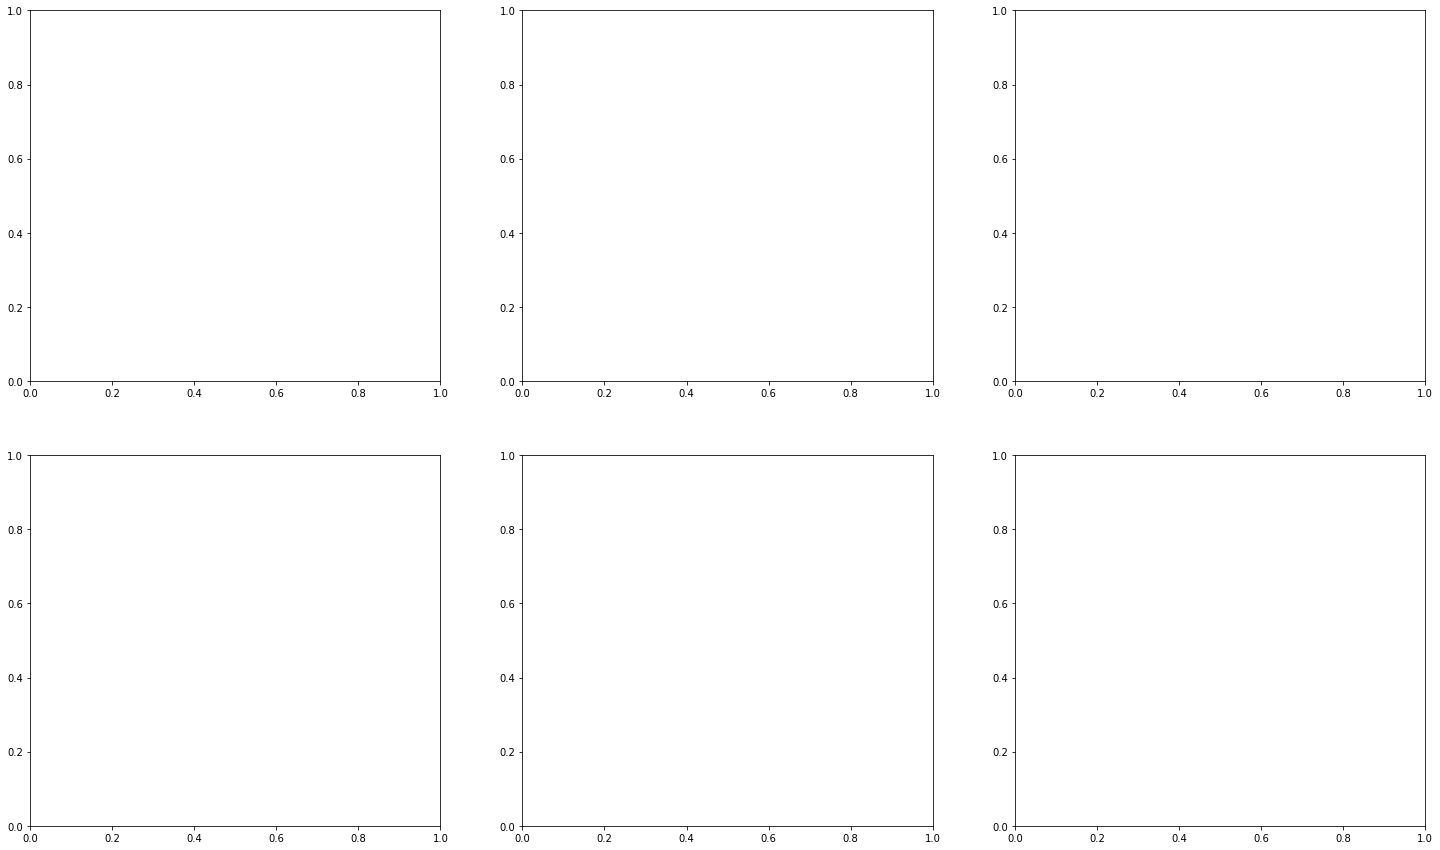

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(25,15))

#(df3['Fioul']/df3['FioulReCalc']).plot(ax=axes[0,0])
#(df3['Gaz']/df3['GazReCalc']).plot(ax=axes[0,1])
#(df3['Hydraulique']/df3['HydrauliqueReCalc']).plot(ax=axes[0,2])
#(df3['Bioenergies']/df3['BioenergiesReCalc']).plot(ax=axes[1,0])
#(df3['EchPhysiques']/df3['EchPhysiquesReCalc']).plot(ax=axes[1,1])
#(df3['Consommation']/df3['ConsommationReCalc']).plot(ax=axes[1,2])

# Calculation of a few quantities

In [5]:
def CalcSums(year):
    ProdTotSum = df3[year]['ProdTot'].sum()
    ConsoSum = df3[year]['Consommation'].sum()
    NucleaireSum = df3[year]['Nucleaire'].sum()
    BioenergiesSum = df3[year]['Bioenergies'].sum()
    
    print('Total production in', year, '=', ProdTotSum*0.5/1e6, 'TWh')
    print('Total consommation', year, '=', ConsoSum*0.5/1e6, 'TWh')
    print('Total nucleaire', year, ' =', NucleaireSum*0.5/1e6, 'TWh')
    print('Total bioenergies', year, ' =', BioenergiesSum*0.5/1e6, 'TWh\n')
    
CalcSums('2012')
CalcSums('2013')
CalcSums('2014')
CalcSums('2015')
CalcSums('2016')
CalcSums('2017')

Total production in 2012 = 530.675776 TWh
Total consommation 2012 = 478.7028835 TWh
Total nucleaire 2012  = 398.016033 TWh
Total bioenergies 2012  = 5.737503 TWh

Total production in 2013 = 547.877424 TWh
Total consommation 2013 = 491.6934635 TWh
Total nucleaire 2013  = 402.9806205 TWh
Total bioenergies 2013  = 6.1928555 TWh

Total production in 2014 = 538.1836675 TWh
Total consommation 2014 = 462.322275 TWh
Total nucleaire 2014  = 415.4826695 TWh
Total bioenergies 2014  = 7.5095575 TWh

Total production in 2015 = 544.597933 TWh
Total consommation 2015 = 473.124304 TWh
Total nucleaire 2015  = 416.4310515 TWh
Total bioenergies 2015  = 7.915845 TWh

Total production in 2016 = 529.3471385 TWh
Total consommation 2016 = 480.3204315 TWh
Total nucleaire 2016  = 383.704247 TWh
Total bioenergies 2016  = 8.711365 TWh

Total production in 2017 = 527.184419 TWh
Total consommation 2017 = 479.0446475 TWh
Total nucleaire 2017  = 378.8862385 TWh
Total bioenergies 2017  = 9.4386275 TWh



# Global plots

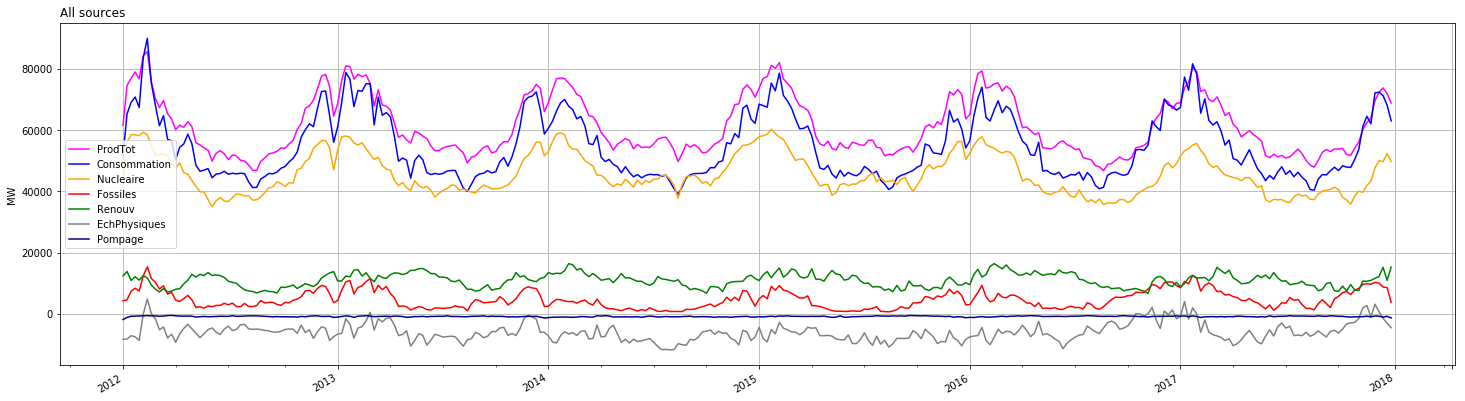

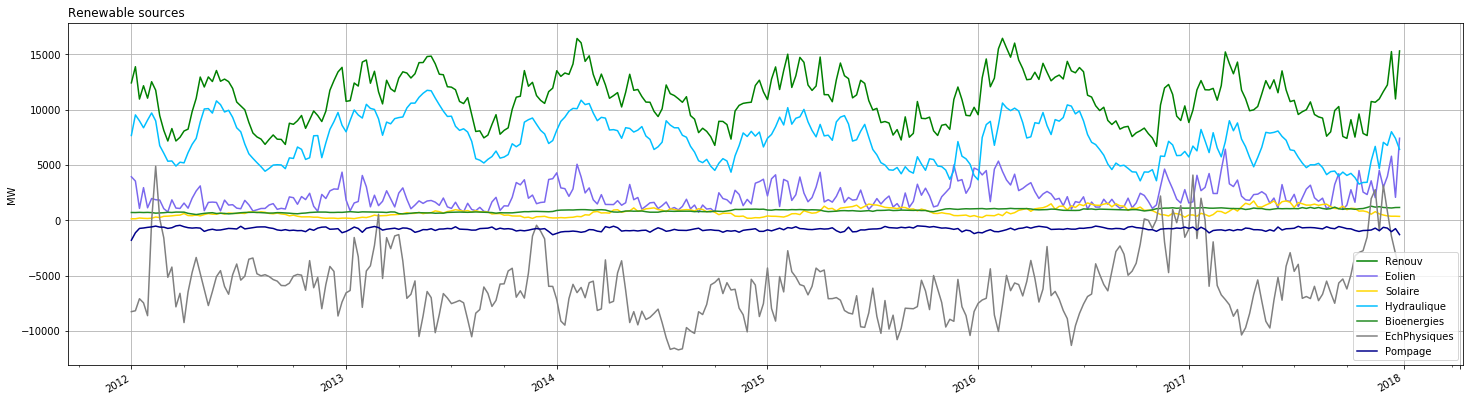

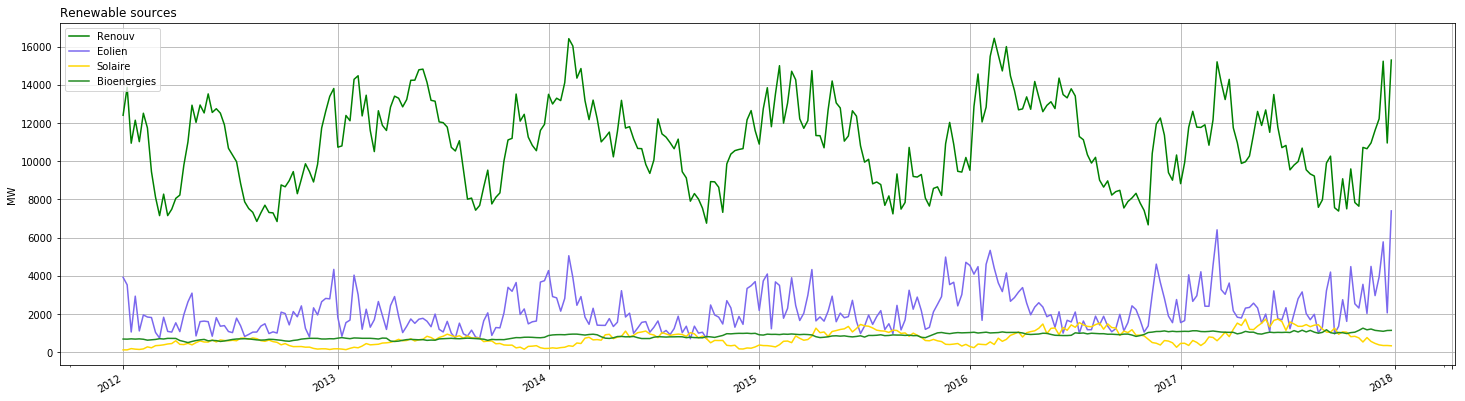

In [6]:
group='W'

##############
what = ['ProdTot', 'Consommation', 'Nucleaire', 'Fossiles', 'Renouv', 'EchPhysiques', 'Pompage']
ax = df3.resample(group).mean().plot(y=what, \
                grid=True, \
                figsize=(25, 7), color=colors(what))
ax.set_title('All sources', loc='left')
ax.set_xlabel('')
ax.set_ylabel('MW')
plt.gcf().autofmt_xdate()

#############
what = ['Renouv', 'Eolien', 'Solaire', 'Hydraulique', 'Bioenergies', 'EchPhysiques', 'Pompage']
ax = df3.resample(group).mean().plot(y=what, \
                grid=True, \
                figsize=(25, 7), color=colors(what))
ax.set_title('Renewable sources', loc='left')
ax.set_xlabel('')
ax.set_ylabel('MW')
plt.gcf().autofmt_xdate()

#############
what = ['Renouv', 'Eolien', 'Solaire', 'Bioenergies']
ax = df3.resample(group).mean().plot(y=what, \
                grid=True, \
                figsize=(25, 7), color=colors(what))
ax.set_title('Renewable sources', loc='left')
ax.set_xlabel('')
ax.set_ylabel('MW')
plt.gcf().autofmt_xdate()

# Monthly plots

In [7]:
#df4 = df3.loc[:, 'Fioul' : 'Bioenergies']

def plotPeriod(what, dateinf, datesup, title, xlabel, ax):
    df5 = df3[dateinf : datesup]
    ax = df5.plot(\
                  y=what, \
                  grid=True,\
                  ax=ax,\
                  color=colors(what))
    ax.set_title(title, loc='left')
    ax.set(xlabel=xlabel, ylabel='MW')
    ax.xaxis.set_label_coords(1.02, 0)
    ax.grid(True, which='minor', axis='x' )
    #ax.grid('off', which='major', axis='x' )
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    highlight_weekends(ax, df5.index.to_series())

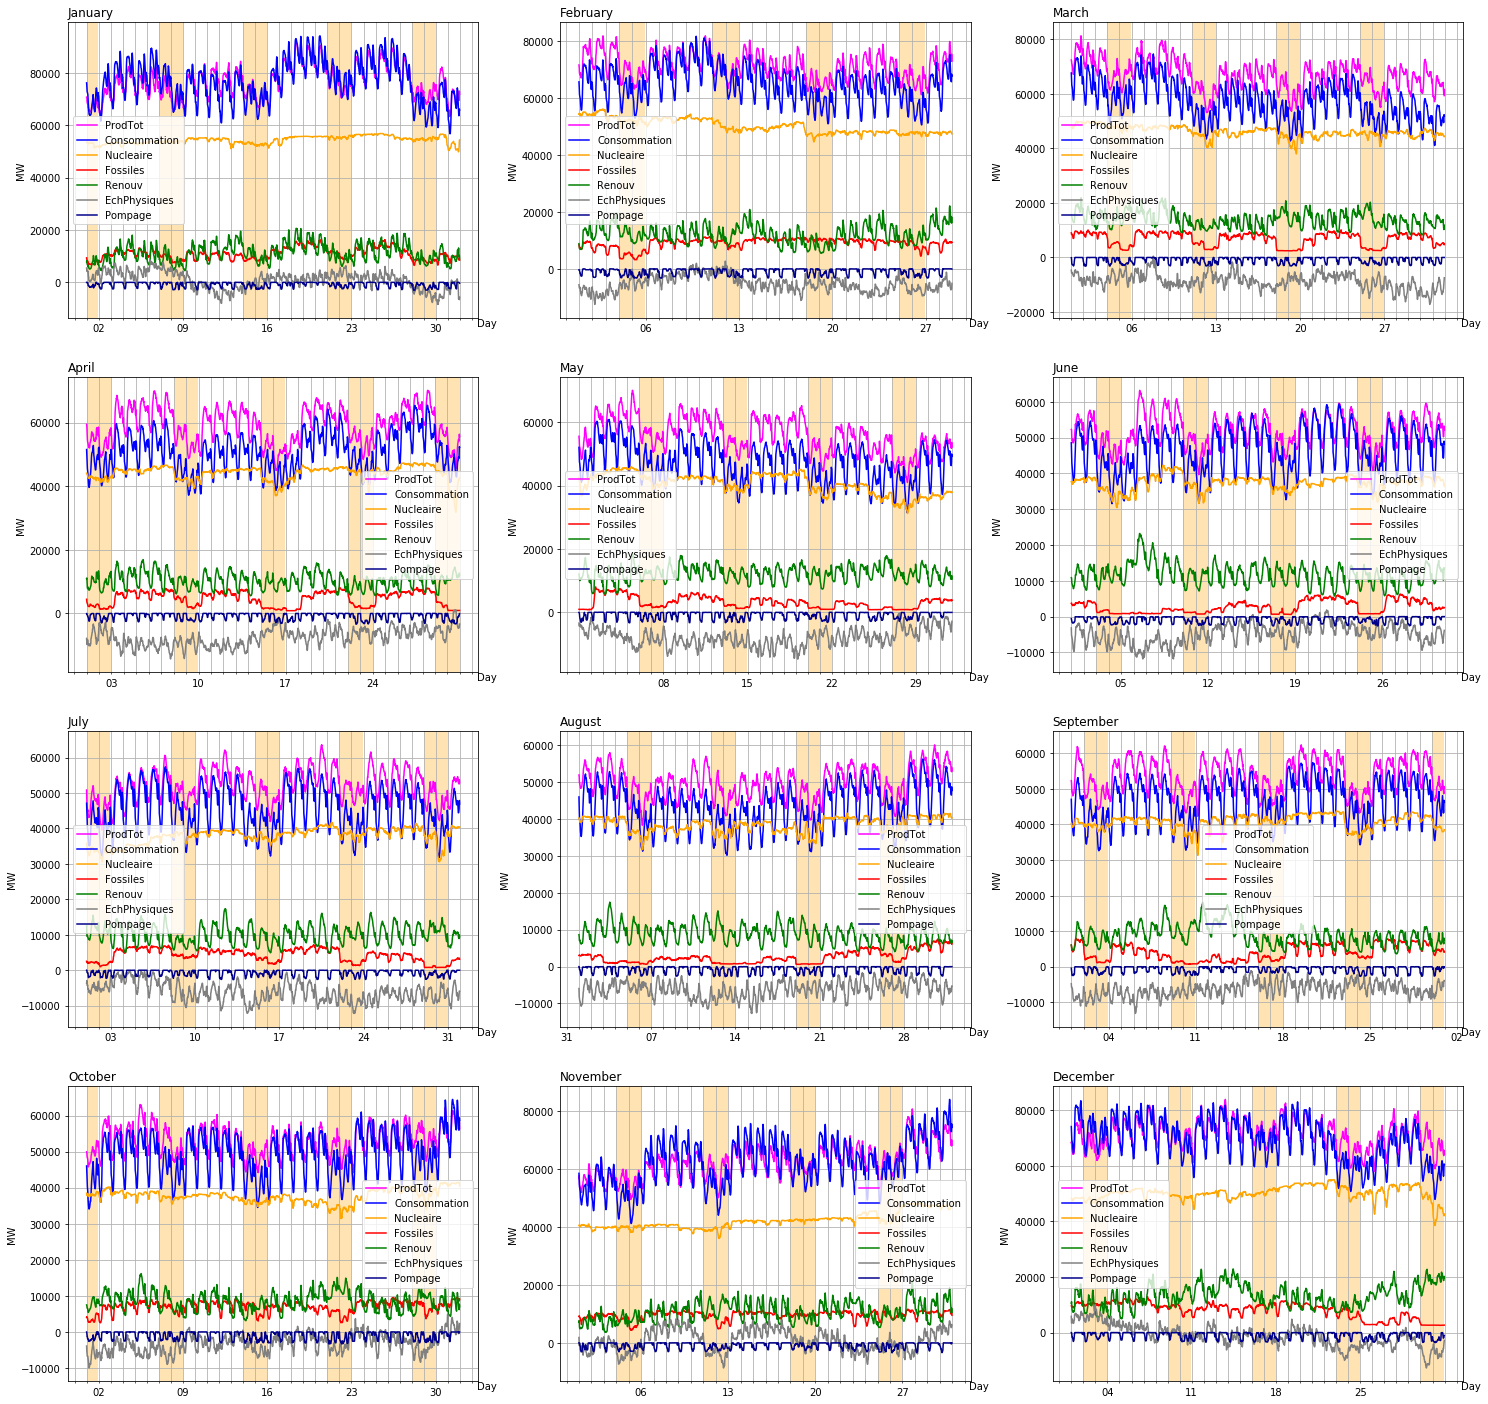

In [8]:
what = ['ProdTot', 'Consommation', 'Nucleaire', 'Fossiles', 'Renouv', 'EchPhysiques', 'Pompage']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,25))
plotPeriod(what, '2017-01-01', '2017-01-31', 'January', 'Day', axes[0,0])
plotPeriod(what, '2017-02-01', '2017-02-28', 'February', 'Day', axes[0,1])
plotPeriod(what, '2017-03-01', '2017-03-31', 'March', 'Day', axes[0,2])
plotPeriod(what, '2017-04-01', '2017-04-30', 'April', 'Day', axes[1,0])
plotPeriod(what, '2017-05-01', '2017-05-31', 'May', 'Day', axes[1,1])
plotPeriod(what, '2017-06-01', '2017-06-30', 'June', 'Day', axes[1,2])
plotPeriod(what, '2017-07-01', '2017-07-31', 'July', 'Day', axes[2,0])
plotPeriod(what, '2017-08-01', '2017-08-31', 'August', 'Day', axes[2,1])
plotPeriod(what, '2017-09-01', '2017-09-30', 'September', 'Day', axes[2,2])
plotPeriod(what, '2017-10-01', '2017-10-31', 'October', 'Day', axes[3,0])
plotPeriod(what, '2017-11-01', '2017-11-30', 'November', 'Day', axes[3,1])
plotPeriod(what, '2017-12-01', '2017-12-31', 'December', 'Day', axes[3,2])

# Weekly plots

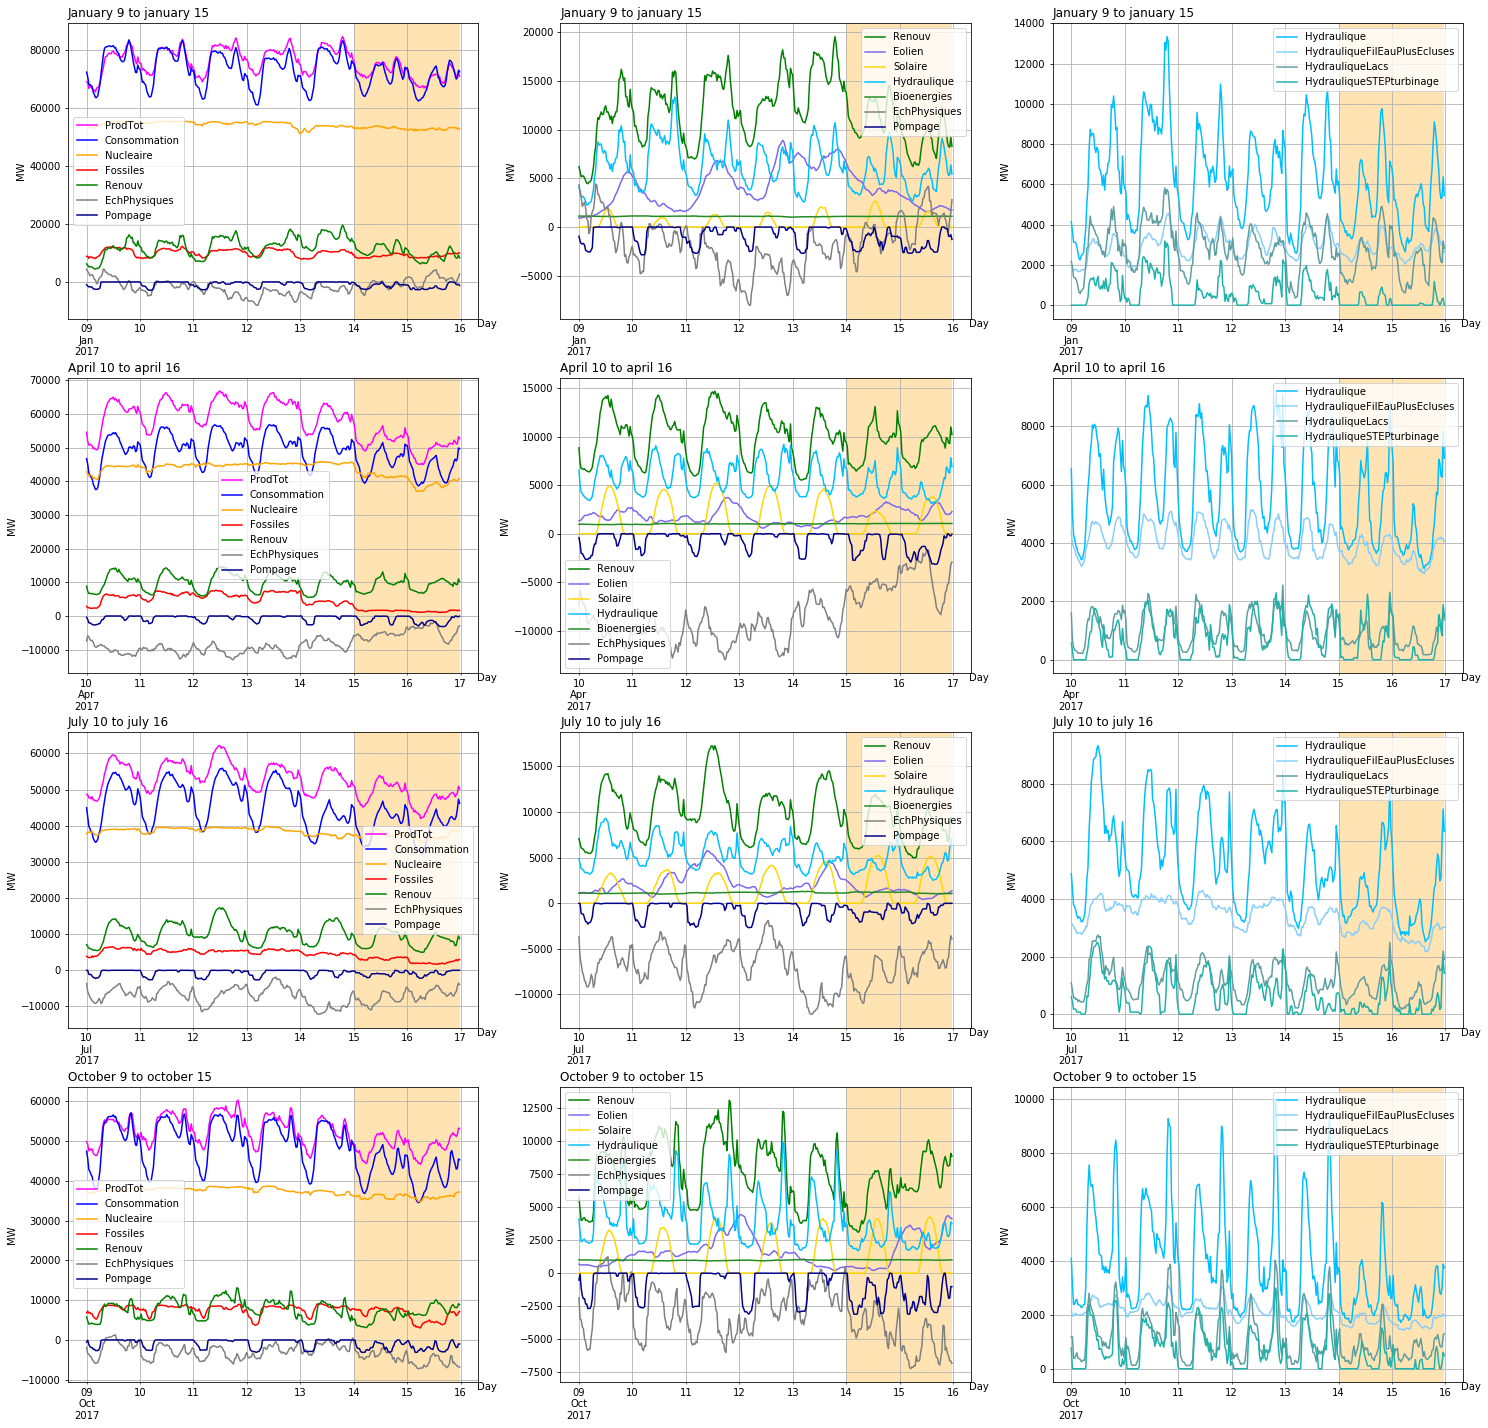

In [9]:
what1 = ['ProdTot', 'Consommation', 'Nucleaire', 'Fossiles', 'Renouv', 'EchPhysiques', 'Pompage']
what2 = ['Renouv', 'Eolien', 'Solaire', 'Hydraulique', 'Bioenergies', 'EchPhysiques', 'Pompage']
what3 = ['Hydraulique', 'HydrauliqueFilEauPlusEcluses', 'HydrauliqueLacs', 'HydrauliqueSTEPturbinage']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,25))
plotPeriod(what1, '2017-01-9', '2017-01-15', 'January 9 to january 15', 'Day', axes[0,0])
plotPeriod(what2, '2017-01-9', '2017-01-15', 'January 9 to january 15', 'Day', axes[0,1])
plotPeriod(what3, '2017-01-9', '2017-01-15', 'January 9 to january 15', 'Day', axes[0,2])
plotPeriod(what1, '2017-04-10', '2017-04-16', 'April 10 to april 16', 'Day', axes[1,0])
plotPeriod(what2, '2017-04-10', '2017-04-16', 'April 10 to april 16', 'Day', axes[1,1])
plotPeriod(what3, '2017-04-10', '2017-04-16', 'April 10 to april 16', 'Day', axes[1,2])
plotPeriod(what1, '2017-07-10', '2017-07-16', 'July 10 to july 16', 'Day', axes[2,0])
plotPeriod(what2, '2017-07-10', '2017-07-16', 'July 10 to july 16', 'Day', axes[2,1])
plotPeriod(what3, '2017-07-10', '2017-07-16', 'July 10 to july 16', 'Day', axes[2,2])
plotPeriod(what1, '2017-10-9', '2017-10-15', 'October 9 to october 15', 'Day', axes[3,0])
plotPeriod(what2, '2017-10-9', '2017-10-15', 'October 9 to october 15', 'Day', axes[3,1])
plotPeriod(what3, '2017-10-9', '2017-10-15', 'October 9 to october 15', 'Day', axes[3,2])

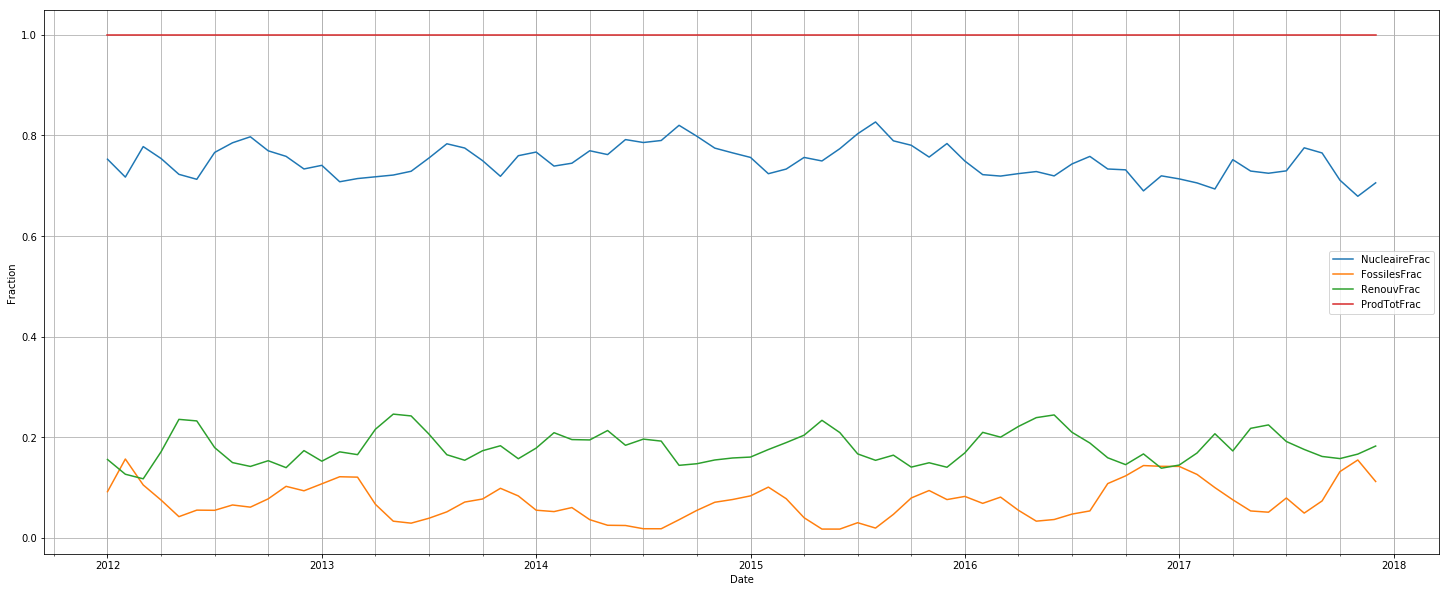

In [10]:
ax = df3.resample('M').mean().plot(y=['NucleaireFrac', 'FossilesFrac', 'RenouvFrac', 'ProdTotFrac'], grid=True, figsize=(25,10))
ax.set(xlabel='Date', ylabel='Fraction')
ax.grid(True, which='minor', axis='x' )

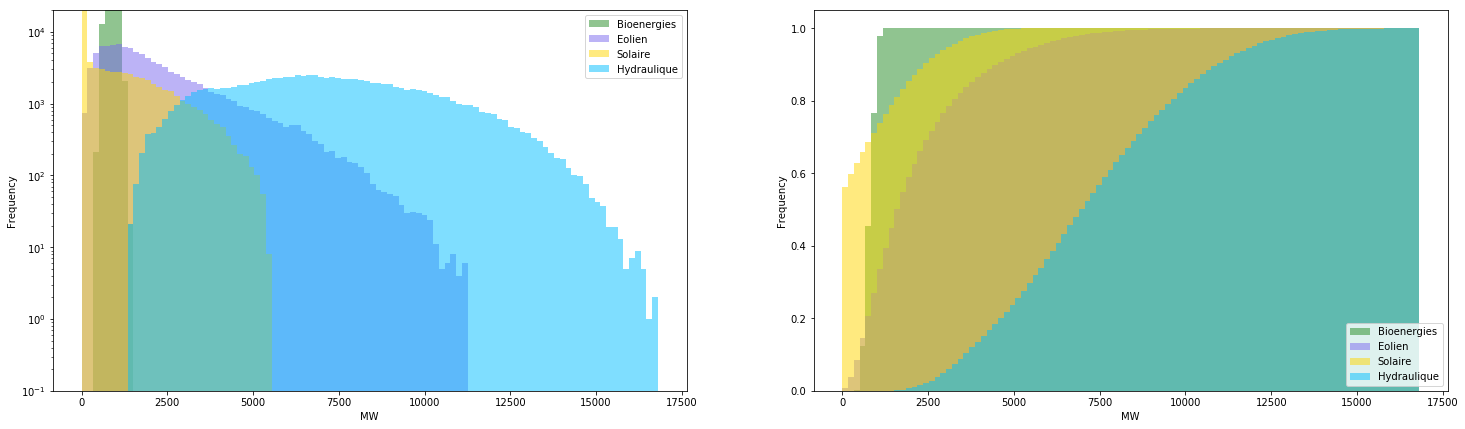

In [11]:
what = ['Bioenergies', 'Eolien', 'Solaire', 'Hydraulique']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))
df3[what].plot(kind='hist', bins=100, alpha=0.5, ylim=(0.1, 20000), color=colors(what), logy=True, ax=axes[0])
axes[0].set_xlabel('MW')

df3[what].plot(kind='hist', cumulative=True, density=True, bins=100, alpha=0.5, color=colors(what), ax=axes[1])
axes[1].set_xlabel('MW')
axes[1].legend(loc='lower right')

,ProdTot,Hydraulique,Nucleaire,Fossiles
ProdTot,1.000000,0.723949,0.897190,0.686855
Hydraulique,0.723949,1.000000,0.507321,0.676022
Nucleaire,0.897190,0.507321,1.000000,0.414461
Fossiles,0.686855,0.676022,0.414461,1.000000


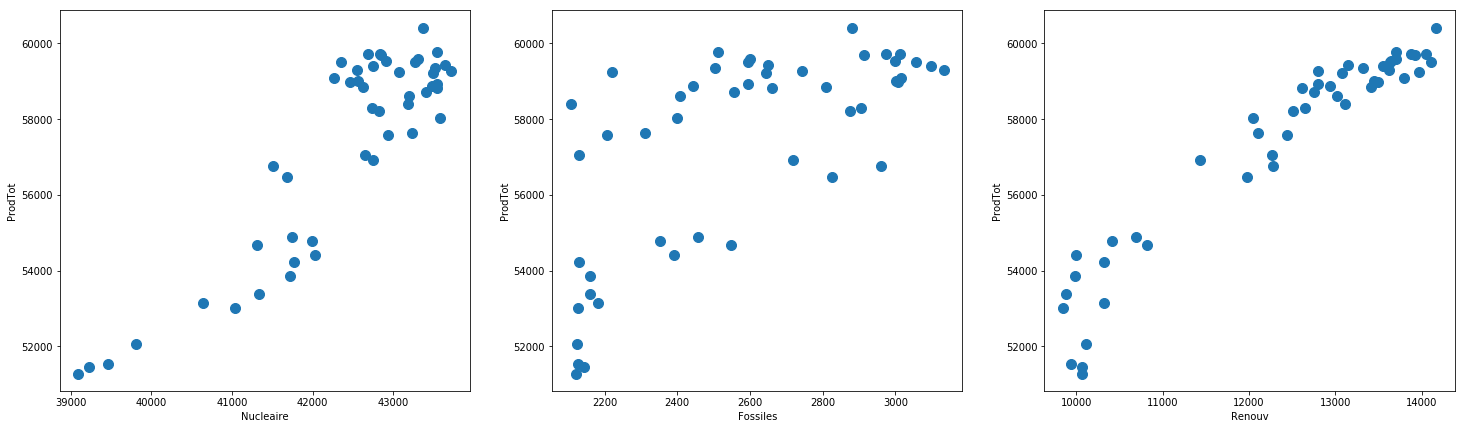

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
dftemp = df3['2013-07-10' : '2013-07-10']
dftemp.plot(kind='scatter', y='ProdTot', x='Nucleaire', ax=axes[0], s=100)
dftemp.plot(kind='scatter', y='ProdTot', x='Fossiles', ax=axes[1], s=100)
dftemp.plot(kind='scatter', y='ProdTot', x='Renouv', ax=axes[2], s=100)

what = ['ProdTot', 'Hydraulique', 'Nucleaire', 'Fossiles']
dftemp[what].corr()

# Fourier tranform

DateTime
2017-01-01 00:00:00    70652.5
2017-01-01 01:00:00    68720.5
2017-01-01 02:00:00    67924.0
2017-01-01 03:00:00    66925.5
2017-01-01 04:00:00    65850.5
Freq: H, Name: ProdTot, dtype: float64
[70652.5 68720.5 67924.  ... 64880.5 63824.5 64959. ]
number of values = 8760 8760
freqs = [ 0.          0.00011416  0.00022831 ... -0.00034247 -0.00022831
 -0.00011416]


Text(0.5,0,'Frequency')

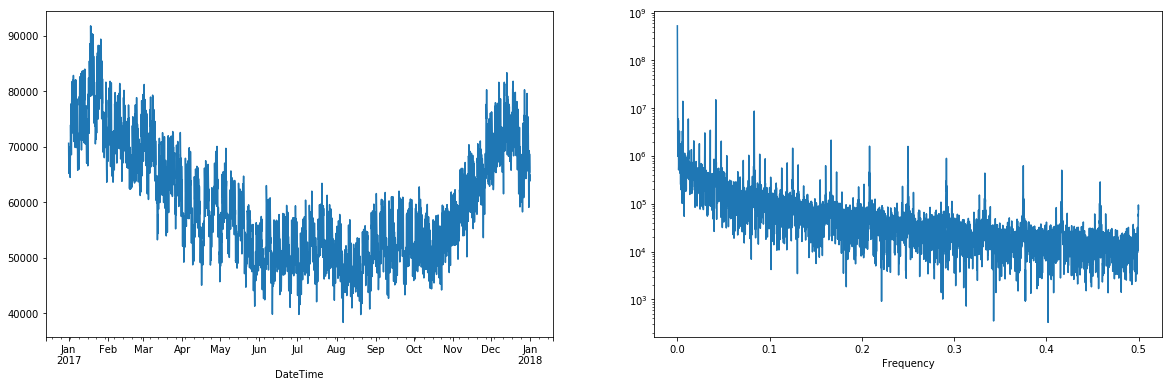

In [46]:
import scipy.fftpack

dftemp = df3['2017']['ProdTot'].resample('H').mean()

print(dftemp.head())

vals=dftemp.values
print(vals)

yf = scipy.fft(vals)
print("number of values =", vals.size, yf.size)
freqs = scipy.fftpack.fftfreq(yf.size)
print("freqs =", freqs)

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
dftemp.plot()
ax = fig.add_subplot(122)
plt.semilogy(freqs[:freqs.size//2], abs(yf)[:yf.size//2])
plt.xlabel("Frequency")
#plt.show()

[  0.           1.33779264   2.67558528   4.01337793   5.35117057
   6.68896321   8.02675585   9.36454849  10.70234114  12.04013378
  13.37792642  14.71571906  16.05351171  17.39130435  18.72909699
  20.06688963  21.40468227  22.74247492  24.08026756  25.4180602
  26.75585284  28.09364548  29.43143813  30.76923077  32.10702341
  33.44481605  34.7826087   36.12040134  37.45819398  38.79598662
  40.13377926  41.47157191  42.80936455  44.14715719  45.48494983
  46.82274247  48.16053512  49.49832776  50.8361204   52.17391304
  53.51170569  54.84949833  56.18729097  57.52508361  58.86287625
  60.2006689   61.53846154  62.87625418  64.21404682  65.55183946
  66.88963211  68.22742475  69.56521739  70.90301003  72.24080268
  73.57859532  74.91638796  76.2541806   77.59197324  78.92976589
  80.26755853  81.60535117  82.94314381  84.28093645  85.6187291
  86.95652174  88.29431438  89.63210702  90.96989967  92.30769231
  93.64548495  94.98327759  96.32107023  97.65886288  98.99665552
 100.3344481

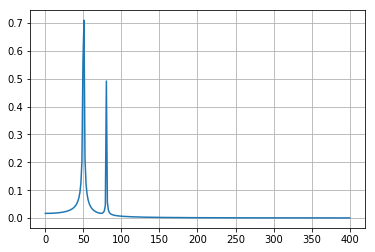

In [45]:
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
#print("x =", x)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
xff = scipy.fftpack.fftfreq(x.size, T)
print(xf[:])
print(xff[:])
#print(1/0.75, 1/(N*T), " xf =", xf)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()